# Technology Innovation 510
## Introduction to Data Science Methods: Machine Learning

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

<br>


---

<br>

🎉 Today, we'll be working from this _digital_ notebook to complete exercises! If you don't have a computer, not to worry. Grab a notepad and pencil to write down your ideas and notes! 🎉

<br>

---

# Preparing Notebook for Demos

## Installing Packages

In colab, we have the ability to install specific packages into our coding environment

In [ ]:
!pip install tensorflow==1.15.0
!apt-get update
!apt-get install -y cmake libopenmpi-dev python3-dev zlib1g-dev
!pip install "stable-baselines[mpi]==2.9.0"

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.com/compute/

## Importing Packages

Once we have our packages installed, we need to import them. We can also import packages that are pre-installed in the Colab environment.

In [ ]:
import tensorflow as tf
from gym import spaces
import gym
from stable_baselines.common.env_checker import check_env
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import LinearRegression
import random
import pandas as pd

## Defining Functions

We also have the ability to define our own functions, and use them elsewhere in the notebook 📝!

In [ ]:
def n_step_ai(board, win_patterns, player_label, n_steps=3):
  opponent = ['X', 'O']
  opponent.remove(player_label)
  opponent = opponent[0]

  avail_moves = {i: 1 for i in board.keys() if board[i] == ' '}
  
  for move in avail_moves.keys():
    temp_board = board.copy()
    temp_board[move] = player_label
    score = get_minimax(n_steps, temp_board, player_label)
    avail_moves[move] = score

  ##########################################
  ### The rest of our ai agent harness is the same
  ##########################################

  # first grab max score
  max_score = max(avail_moves.values())

  # then select all moves that have this max score
  valid = []
  for key, value in avail_moves.items():
    if value == max_score:
      valid.append(key)

  # return a random selection of the moves with the max score
  move = random.choice(valid)

  return move

def minimax(depth, board, maximizing_player, player_label, verbiose=False):
  # infer the opponent
  opponent = ['X', 'O']
  opponent.remove(player_label)
  opponent = opponent[0]

  # set the available moves
  avail_moves = [i for i in board.keys() if board[i] == ' ']

  # check if the depth is 0, or stalemate/winner has been reached
  # if so this is the basecase and we want to return get_score()
  terminal_move = is_terminal_node(board, avail_moves)

  if terminal_move or depth == 0:
    score = get_score(board, player_label, win_patterns)
    if verbiose:
      print('{} score: {}. depth: {}'.format(board, score, depth))
    return score
  
  ### in the following we want to search through every possible board at the 
  ### current level (the possible moves for the current player, given that the
  ### player is either the one whose turn it is or the imagined opponent)

  # call minimax where it is the current players turn and so we want to 
  # maximize the score
  if maximizing_player:
    score = -np.Inf
    for move in avail_moves:
      new_board = board.copy()
      new_board[move] = player_label
      score = max(score, minimax(depth-1, new_board, False, player_label, verbiose))
    if verbiose:
      print('{} max. score: {}. depth: {}'.format(board, score, depth))
    return score

  # call minimax where it is the opponent players turn and so we want to
  # minimize the score
  elif not maximizing_player:
    score = np.Inf
    for move in avail_moves:
      new_board = board.copy()
      new_board[move] = opponent
      score = min(score, minimax(depth-1, new_board, True, player_label, verbiose))
    if verbiose:
      print('{} min. score: {}. depth: {}'.format(board, score, depth))
    return score

def is_terminal_node(board, avail_moves):
  if check_winning(board, win_patterns):
    return True
  elif check_stalemate(board, win_patterns):
    return True
  else:
    return False

def get_score(board, player_label, win_patterns):
  # this will look somewhat similar to our 1-step lookahead algorithm
  opponent = ['X', 'O']
  opponent.remove(player_label)
  opponent = opponent[0]
  score = 0
  for pattern in win_patterns:
      values = [board[i] for i in pattern] 
      # if the opponent wins, the score is -100
      if values == [opponent, opponent, opponent]:
        score = -100
      elif values == [player_label, player_label, player_label]:
        score = 100
  return score

# we're going to pull out and reformat some of our helper functions in the
# TicTacToe class

win_patterns = [[1,2,3], [4,5,6], [7,8,9],
                [1,4,7], [2,5,8], [3,6,9],
                [1,5,9], [7,5,3]]

def check_winning(board, win_patterns):
  for pattern in win_patterns:
    values = [board[i] for i in pattern] 
    if values == ['X', 'X', 'X'] or values == ['O', 'O', 'O']:
      return True
  return False

def check_stalemate(board, win_patterns):
  if (' ' not in board.values()) and (check_winning(board, win_patterns) == ''):
    return True
  return False

def get_minimax(depth, board, player_label, verbiose=False):
  score = minimax(depth-1, board, False, player_label, verbiose=verbiose)
  return score

def n_step_ai_temp(board, win_patterns, player_label, n_steps, verbiose=False):
  opponent = ['X', 'O']
  opponent.remove(player_label)
  opponent = opponent[0]

  avail_moves = {i: 1 for i in board.keys() if board[i] == ' '}
  
  for move in avail_moves.keys():
    temp_board = board.copy()
    temp_board[move] = player_label
    score = get_minimax(n_steps, temp_board, player_label, verbiose=verbiose)
    avail_moves[move] = score
  return avail_moves

def one_step_ai(board, win_patterns, player_label):
  opponent = ['X', 'O']
  opponent.remove(player_label)
  opponent = opponent[0]

  avail_moves = {i: 1 for i in board.keys() if board[i] == ' '}
  temp_board = board.copy()
  ########################################
  # we're going to change the following lines, instead of caring
  # whether we've found the best move, we want to update the move
  # with a score
  ########################################

  # check if the opponent has a winning move first, we will overwrite
  # the score for this move if it is also a winning move for the current 
  # player
  for move in avail_moves.keys():
    temp_board[move] = opponent
    for pattern in win_patterns:
        values = [temp_board[i] for i in pattern] 
        if values == [opponent, opponent, opponent]:
          avail_moves[move] = 10
    temp_board[move] = ' '

  for move in avail_moves.keys():
    temp_board[move] = player_label
    for pattern in win_patterns:
        values = [temp_board[i] for i in pattern] 
        if values == [player_label, player_label, player_label]:
          avail_moves[move] = 100
    temp_board[move] = ' '

  # first grab max score
  max_score = max(avail_moves.values())

  # then select all moves that have this max score
  valid = []
  for key, value in avail_moves.items():
    if value == max_score:
      valid.append(key)

  # return a random selection of the moves with the max score
  move = random.choice(valid)

  return move

class TicTacToe:
  # can preset winner and starting player
  def __init__(self, winner='', start_player=''): 
    self.winner = winner
    self.start_player = start_player
    self.board = {1: ' ',
         2: ' ',
         3: ' ',
         4: ' ',
         5: ' ',
         6: ' ',
         7: ' ',
         8: ' ',
         9: ' ',}
    self.win_patterns = [[1,2,3], [4,5,6], [7,8,9],
                [1,4,7], [2,5,8], [3,6,9],
                [1,5,9], [7,5,3]]
         
  # the other functions are now passed self
  def visualize_board(self):
    print(
      "|{}|{}|{}|\n|{}|{}|{}|\n|{}|{}|{}|\n".format(*self.board.values())
      )

  def check_winning(self):
    for pattern in self.win_patterns:
      values = [self.board[i] for i in pattern] 
      if values == ['X', 'X', 'X']:
        self.winner = 'X' # we update the winner status
        return "'X' Won!"
      elif values == ['O', 'O', 'O']:
        self.winner = 'O'
        return "'O' Won!"
    return ''

  def check_stalemate(self):
    if (' ' not in self.board.values()) and (self.check_winning() == ''):
      self.winner = 'Stalemate'
      return "It's a stalemate!"

class GameEngine(TicTacToe):
  def __init__(self, setup='auto', user_ai=None):
    super().__init__()
    self.setup = setup
    self.user_ai = user_ai

  def heuristic_ai(self, player_label):
    opponent = ['X', 'O']
    opponent.remove(player_label)
    opponent = opponent[0]

    avail_moves = [i for i in self.board.keys() if self.board[i] == ' ']
    temp_board = self.board.copy()
    middle = 5
    corner = [1,3,7,9]
    side = [2,4,6,8]

    # first check for a winning move
    move_found = False
    for move in avail_moves:
      temp_board[move] = player_label
      for pattern in self.win_patterns:
          values = [temp_board[i] for i in pattern] 
          if values == [player_label, player_label, player_label]:
            move_found = True       
            break
      if move_found:   
        break
      else:
        temp_board[move] = ' '

    # check if the opponent has a winning move
    if move_found == False:
      for move in avail_moves:
        temp_board[move] = opponent
        for pattern in self.win_patterns:
            values = [temp_board[i] for i in pattern] 
            if values == [opponent, opponent, opponent]:
              move_found = True       
              break
        if move_found:   
          break
        else:
          temp_board[move] = ' '

    # check if middle avail
    if move_found == False:
      if middle in avail_moves:
        move_found = True
        move = middle

    # check corners
    if move_found == False:
      move_corner = [val for val in avail_moves if val in corner]
      if len(move_corner) > 0:
        move = random.choice(move_corner)
        move_found = True

    # check side
    if move_found == False:
      move_side = [val for val in avail_moves if val in side]
      if len(move_side) > 0:
        move = random.choice(move_side)
        move_found = True

    return move

  def random_ai(self):
    while True:
      move = random.randint(1,9)
      if self.board[move] != ' ':
        continue
      else:
        break
    return move

  def setup_game(self):

    if self.setup == 'user':
      players = int(input("How many Players? (type 0, 1, or 2)"))
      self.player_meta = {'first': {'label': 'X',
                                    'type': 'ai'}, 
                    'second': {'label': 'O',
                                    'type': 'human'}}
      if players != 2:
        ########## 
        # Allow the user to set the ai level
        ########## 

        ### if they have not provided an ai_agent
        if self.user_ai == None:
          level = int(input("select AI level (1, 2)"))
          if level == 1:
            self.ai_level = 1
          elif level == 2:
            self.ai_level = 2
          else:
            print("Unknown AI level entered, this will cause problems")
        else:
          self.ai_level = 3

      if players == 1:
        first = input("who will go first? (X, (AI), or O (Player))")
        if first == 'O':
          self.player_meta = {'second': {'label': 'X',
                                    'type': 'ai'}, 
                        'first': {'label': 'O',
                                    'type': 'human'}}
        

      elif players == 0:
        first = random.choice(['X', 'O'])
        if first == 'O':
          self.player_meta = {'second': {'label': 'X',
                                    'type': 'ai'}, 
                        'first': {'label': 'O',
                                    'type': 'ai'}}                                
        else:
          self.player_meta = {'first': {'label': 'X',
                                    'type': 'ai'}, 
                        'second': {'label': 'O',
                                    'type': 'ai'}}

        
    elif self.setup == 'auto':
      first = random.choice(['X', 'O'])
      if first == 'O':
        self.start_player = 'O'
        self.player_meta = {'second': {'label': 'X',
                                  'type': 'ai'}, 
                      'first': {'label': 'O',
                                  'type': 'ai'}}                                
      else:
        self.start_player = 'X'
        self.player_meta = {'first': {'label': 'X',
                                  'type': 'ai'}, 
                      'second': {'label': 'O',
                                  'type': 'ai'}}
      ########## 
      # and automatically set the ai level otherwise
      ##########  
      if self.user_ai == None:                           
        self.ai_level = 2
      else:
        self.ai_level = 3

  def play_game(self):
    while True:
      for player in ['first', 'second']:  
        self.visualize_board()
        player_label = self.player_meta[player]['label']
        player_type = self.player_meta[player]['type']

        if player_type == 'human':
          move = input("{}, what's your move?".format(player_label))
          # we're going to allow the user to quit the game from the input line
          if move in ['q', 'quit']:
            self.winner = 'F'
            print('quiting the game')
            break

          move = int(move)
          if self.board[move] != ' ':
            while True:
              move = input("{}, that position is already taken! "\
                          "What's your move?".format(player_label))  
              move = int(move)            
              if self.board[move] != ' ':
                continue
              else:
                break

        else:
          ##########
          # Our level 1 ai agent (random)
          ##########
          if self.ai_level == 1:
            move = self.random_ai()

          ##########
          # Our level 2 ai agent (heuristic)
          ##########
          elif self.ai_level == 2:
            move = self.heuristic_ai(player_label)

          ##########
          # Our user-defined AI agent
          ##########
          elif self.ai_level == 3:
            move = self.user_ai(self.board, self.win_patterns, player_label)

        self.board[move] = player_label

        # the winner varaible will now be check within the board object
        self.check_winning()
        self.check_stalemate()

        if self.winner == '':
          continue

        elif self.winner == 'Stalemate':
          print(self.check_stalemate())
          self.visualize_board()
          break

        else:
          print(self.check_winning())
          self.visualize_board()
          break
      if self.winner != '':
        return self

class TicTacToeGym(GameEngine, gym.Env):
  def __init__(self, user_ai=None, ai_level=1):
    super().__init__()
    self.setup = 'auto'
    # the default behavior will be no user_ai and ai_level set to 1 (random)
    self.user_ai = user_ai
    self.ai_level = ai_level

    # the board now has integers as values instead of strings
    self.board = {1: 0,
         2: 0,
         3: 0,
         4: 0,
         5: 0,
         6: 0,
         7: 0,
         8: 0,
         9: 0,}
    
    # the available token spaces, note that in order to access our board
    # dictionary these actions will need to be re-indexed to 1
    self.action_space = spaces.Discrete(9)

    # the observation space requires int rep for player tokens
    self.observation_space = spaces.Box(low=0, high=2, shape=(9,), dtype=np.int)
    self.reward_range = (-10, 1)

    # we will redefine our player labels as ints
    self.player_label = 1
    self.opponent_label = 2

    # for StableBaselines
    self.spec = None
    self.metadata = None

  ##############################################################################
  # we will have to redefine any function in our previous module that makes use
  # of the string entries, X and O on the board. We need to replace the logic
  # with 1's and 2's
  ##############################################################################
  def check_winning(self):
    for pattern in self.win_patterns:
      values = [self.board[i] for i in pattern] 
      if values == [1, 1, 1]:
        self.winner = 'X' # we update the winner status
        return "'X' Won!"
      elif values == [2, 2, 2]:
        self.winner = 'O'
        return "'O' Won!"
    return ''

  def check_stalemate(self):
    if (0 not in self.board.values()) and (self.check_winning() == ''):
      self.winner = 'Stalemate'
      return "It's a stalemate!"

  def reset_game(self):
    overwrite_ai = self.ai_level
    self.board = {1: 0,
         2: 0,
         3: 0,
         4: 0,
         5: 0,
         6: 0,
         7: 0,
         8: 0,
         9: 0,}
    self.winner = ''
    self.setup_game()
    self.ai_level = overwrite_ai
    # depending now on if X or O is first will need to take the AI's first step
    if self.start_player == 'O':
      move = self.random_ai()
      self.board[move] = 2

  def reset(self):
    self.reset_game()
    state = np.array(list(self.board.values())).reshape(9,)
    return state

  def random_ai(self):
    while True:
      move = random.randint(1,9)
      if self.board[move] != 0:
        continue
      else:
        break
    return move

  ##############################################################################
  # we will have to recycle a lot of what was previously wrapped up in 
  # play_game() since gym needs access to every point after the Reinf AI
  # makes a move
  ##############################################################################
  def step(self, action):

      # gym discrete indexes at 0, our board indexes at 1
      move = action + 1
      # Check if agent's move is valid
      avail_moves = [i for i in self.board.keys() if self.board[i] == 0]
      is_valid = move in avail_moves

      # if valid, then play the move, and let the other opponent make a move
      # as well
      if is_valid: # Play the move
          # update board
          self.board[move] = self.player_label
          self.check_winning()
          self.check_stalemate()

          if self.winner == '':
            ##################################################################
            # instead of continuing as we did in our play_game loop we will
            # take one additional step for the AI and then let openAI gym
            # handle incrementing between steps.
            ##################################################################

            ##########
            # Our level 1 ai agent (random)
            ##########
            # if self.ai_level == 1:
            move = self.random_ai()

            # ##########
            # # Our level 2 ai agent (heuristic)
            # ##########
            # elif self.ai_level == 2:
            #   move = self.heuristic_ai('O')

            # ##########
            # # Our user-defined AI agent
            # ##########
            # elif self.ai_level == 3:
            #   move = self.user_ai(self.board, self.win_patterns, 'O')

            self.board[move] = self.opponent_label
            self.check_winning()
            self.check_stalemate()

            if self.winner == '':
              reward, done, info = 1/9, False, {}
          
          if self.winner == 'Stalemate':
            reward, done, info = -1, True, {}

          elif self.winner == 'X':
            reward, done, info = 100, True, {}

          elif self.winner == 'O':
            reward, done, info = -10, True, {}

      else: # End the game and penalize agent
          reward, done, info = -100, True, {}

      state = np.array(list(self.board.values())).reshape(9,)
      return state, reward, done, info

In [ ]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

env = TicTacToeGym()
model = PPO2(MlpPolicy, env, verbose=1)

Wrapping the env in a DummyVecEnv.


## 🧠 What is Machine Learning?

In the previous exercise(s) I purposefully set my own answer for examples of AI in history to _automata of the renaissance_ because it accentuates an important deliniation between AI and machine learning. At some point in the past, we thought, predominantly, that we would have to program _a priori_ all the intelligence of any thinking machine. In other words, it would not necessarily learn on its own. It is like the _automata_ of the renaissance in that all the internal mechanisms and functions would need to be setup beforehand, and initialized.

Around the late 90s and into the 2000s, this way of thinking began to fade. It was replaced with the idea that computers would learn from examples. In a sentence, machine learning is just that:

> "learning from examples"

and that's it. Of course, there are many ins and outs and what-have-yous. But in the context of AI, this is the most important distinction of machine learning. With this shift in ML, the traditional way of thinking about AI was recapitulated as "symbolic AI" - translation of human logic into computer code.

### Everyday Machine Learning

#### 💭 4

Where do you use machine learning in your day to day activities? You will be SO surprised where machine learning is working behind the scenes. Let's take some time and jot down your top 5 places that you use machine learning.


My top 5 ML interactions in my day-to-day:

```
my_ml_tools = ['spotify discovery playlist', 
               'face recognition on my laptop',
               'google maps', 
               'spelling correction on my iPhone', 
               'gmail sentence autocompletion']
```

#### 💬 4

Can we assimilate our notes? What were some of the most common places folks found that they use machine learning? 

### The Algorithms of Machine Learning

Now that we have some real world examples of where machine learning is being used and where we interact with it, let's find out exactly what kinds of algorithms are operating under the hood.

 #### 💭 5

 For the application/product that influences you the most, find out what kind of algorithm(s) are being used by the application. Jot it down. It's okay if we don't understand what they mean yet.

#### 💬 5

I'll start by sharing what I've found out about the underlying algorithms of [Spotify Discover Weekly](https://hackernoon.com/spotifys-discover-weekly-how-machine-learning-finds-your-new-music-19a41ab76efe).

Spotify actually uses 3 different algorithms to make its discover weekly playlist. 

1. Collaborative Filtering: _similar users will like similar songs_
2. Natural Language Processing: _blogs, articles, and lyrics in the songs can be used to model the songs_
3. Audio Processing: _audio tracks themselves of the songs can be used to generate representations of the songs_

What algorithms did you all uncover?

### Different Kinds of Machine Learning

So we've recognized that machine learning is in a lot of different tools we use. We've noted the names to a few of those models. We've even defined machine learning in the context of AI. Now let's add some rigor to how we categorize the different kinds of ML models.

Currently we think of ML in 3 different contexts:

* Supervised learning
* Unsupervised learning
* Reinforcement learning

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/machine_learning/ML1.png" width=1000px></img>

#### Supervised learning

Perhaps the easiest of these to understand is supervised learning. Supervised learning we have _labeled data_ that is some kind of description about the data that we usually denote as `X_train` and some target value `y_train`. We use the labeled dataset to train a model that then has the ability to predict new values of `y_test` for unlabeled, unseens data `X_test`. Remember, `y_test` is not known, we are using the model to predict this!

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/machine_learning/ML2.png" width=1000px></img>

**Music Rating**

To continue with my music example. Supervised learning in this context could consist of the following: you generate a bunch of labels or "features" that describe a song, e.g. `[country, rap, classical, electronic, rock]` and the feature vector for each song would be a binary 1 or 0 describing it. So Coldplay's "Clocks" might be `clocks = [0, 0, 0, 1, 1]` or Lil Nas X's "Montero" might be `montero = [0, 1, 0, 0, 0]`. Then, you would label every song with a 1 or 0 indicating whether you liked it or not. You could then train a model on this labeled dataset that would predict whether or not you'd like a given song. Predicting 1 (you like it) or 0 (you don't like it), makes this a **_classification_** model. Admittedly, this would be combersome and not work very well but it is pretty close to what Pandora was actually doing early on in the music recommendation scene. 

**Housing Prices**

We can imagine a slightly different situation with housing prices. Instead of features described by binary 1's and 0's, envision a **_mixed_** dataset of **_continuous_** and **_discrete_** variables. Some features could be continuous, floating point values like locaiton ranking and housing condition. Others could be descrete like the number of rooms or bathrooms. In any case, we could take these features and use them to predict a house value. This would be a **_regression_** model.

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/machine_learning/ML3.png" width=1000px></img>

#### Unsupervised learning

A little less intuitive, unsupervised learning does not require labeled datasets. Rather, it infers something about the data. Again with the music example, Spotify's Collaborative Filterning model is an example of unsupervised learning. The math is a bit complex, but the general idea is that we construct a giant matrix of every song and every user filled with 1's or 0's indicating whether a user has liked the song or not. In this matrix space then, every song and every user is represented by a vector. We can use some mathematical tricks to compute vector distances, and, using this, identify similar users, in other words, we **_cluster_** them. The similar users then can be recommended to like each others songs

* User 1 likes: 🍏, 🍐, 🍅, and 🍆
* User 2 likes: 🍊, 🍐, 🍅, and 🍆!

User 1 should try 🍊 and user 2 should try 🍏!

Or take this example:

* User 3 likes: 🥔, 🍓, 🍋, and 🍑
* User 4 likes: 🥭, 🍓, 🍋, and 🍈

What should user 3 try and what should user 4 try?

There is another category of unsupervised learning called **_dimensionality reduction_** we won't go into detail on that here.



#### Reinforcement learning

Reinforcement learning is a complex and blossoming field. The basic idea of reinforcement learning is that, instead of training a model on data, it trains within an _environment_. The environment of course, produces data; but it is different from supervised learning in that the learning algorithm must make a series of steps to get the "right answer". Because of this, reinforcement learning introduces concepts of _steps_ (the decision the algorithm makes at a point in time), _reward_ (the immediate benefit of that decision), _value estimation_ (the perceived overall value at the end of the simulation), and _policy_ (the mechanism by which we update the behavior of the model in subsequent expsoures to the environment). 

> The nuts and bolts of reinforcement learning is outside the scope of what we will discuss in our few sessions together, but it is good to define it alongside the other two topics: supervised and unsupervised learning!

In the DS track, we will be using reinforcement learning to build AI opponents in Tic-Tac-Toe!

Let's demonstrate some of this. The first two AI agents I will show you will be a simple _random_ AI, followed by a more advanced _symbolic AI_ (just like we talked about above)

> Q: What is Symbolic AI?

In [ ]:
game = GameEngine(setup='user')
game.setup_game()
game.play_game()

How many Players? (type 0, 1, or 2)1
select AI level (1, 2)2
who will go first? (X, (AI), or O (Player))O
| | | |
| | | |
| | | |

O, what's your move?5
| | | |
| |O| |
| | | |

| | | |
| |O| |
|X| | |

O, what's your move?1
|O| | |
| |O| |
|X| | |

|O| | |
| |O| |
|X| |X|

O, what's your move?8
|O| | |
| |O| |
|X|O|X|

|O|X| |
| |O| |
|X|O|X|

O, what's your move?6
|O|X| |
| |O|O|
|X|O|X|

|O|X| |
|X|O|O|
|X|O|X|

O, what's your move?3
It's a stalemate!
|O|X|O|
|X|O|O|
|X|O|X|



While I've demonstrated the game with 'built-in' AI agents, we will also construct our game engine so that we can supply various AI agents to interact with. The next type of AI we build _looks ahead_ in the game space to make optimum decisions.  

In [ ]:
game = GameEngine(setup='user', user_ai=n_step_ai)
game.setup_game()
game.play_game()

How many Players? (type 0, 1, or 2)1
who will go first? (X, (AI), or O (Player))X
| | | |
| | | |
| | | |

| | | |
| | |X|
| | | |

O, what's your move?5
| | | |
| |O|X|
| | | |

| |X| |
| |O|X|
| | | |

O, what's your move?1
|O|X| |
| |O|X|
| | | |

|O|X| |
| |O|X|
| | |X|

O, what's your move?3
|O|X|O|
| |O|X|
| | |X|

|O|X|O|
| |O|X|
|X| |X|

O, what's your move?8
|O|X|O|
| |O|X|
|X|O|X|

It's a stalemate!
|O|X|O|
|X|O|X|
|X|O|X|



Finally, we look at reinforcement learning. In all the previous AI agent scenarios, we had to use _heuristics_, that is, information specific and unique to the given game, to inform our agents. In reinforcement learning, we turn this idea on its head and instead let the agent play many thousands of games to learn the heuristics for itself.

In [ ]:
env = TicTacToeGym()
model = PPO2(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=50000)

Streaming output truncated to the last 5000 lines.
| n_updates          | 6             |
| policy_entropy     | 2.1960971     |
| policy_loss        | -0.0024580606 |
| serial_timesteps   | 768           |
| time_elapsed       | 0.895         |
| total_timesteps    | 768           |
| value_loss         | 3497.284      |
--------------------------------------
--------------------------------------
| approxkl           | 4.4317945e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.00104       |
| fps                | 915           |
| n_updates          | 7             |
| policy_entropy     | 2.195463      |
| policy_loss        | -0.0020172505 |
| serial_timesteps   | 896           |
| time_elapsed       | 1.04          |
| total_timesteps    | 896           |
| value_loss         | 3861.6272     |
--------------------------------------
--------------------------------------
| approxkl           | 1.9049012e-05 |
| clipfrac           | 0.0           |
| explained_v

As we'll see in the DS track, we often have to create handler functions to allow things to play nicely with eachother. This will be the case with environments we build to interact with OpenAI's reinforcement learners:

In [ ]:
def rl_ai(board, win_patterns, player_label, model=model):
  # note that we are simply leaving win_patterns and player_label
  # here so that we can use the game engine as defined in prior
  # sessions, these inputs are ignored.
  
  ai_board = board.copy()
  value_map = {' ': 0,
             'X': 1,
             'O': 2}
  for key in ai_board.keys():
    ai_board[key] = value_map[ai_board[key]]
  
  obs = np.array(list(ai_board.values())).reshape(9,)
  action, _states = model.predict(obs)
  move = action + 1
  return move

In [ ]:
game = GameEngine('user', user_ai=rl_ai)
game.setup_game()
game.play_game()

How many Players? (type 0, 1, or 2)1
who will go first? (X, (AI), or O (Player))X
| | | |
| | | |
| | | |

| | | |
| | | |
| |X| |

O, what's your move?5
| | | |
| |O| |
| |X| |

| | | |
| |O| |
|X|X| |

O, what's your move?9
| | | |
| |O| |
|X|X|O|

| | |X|
| |O| |
|X|X|O|

O, what's your move?1
'O' Won!
|O| |X|
| |O| |
|X|X|O|



#### 💬 6

Take a moment to try to categorize the models you found within supervised or unsupervised machine learning!

## 🦉 Tenets of Machine Learning

We'll take the simple linear regression as an example and discuss some of the core tenets of ML: Bias-variance trade-off, irreducible error, and regularization.

### 📈 Bias-Variance Trade-Off

#### (Over and Underfitting)

The basic premise here is that theres some optimum number of parmeters to include in my model, if I include too few, my model will be too simple (***high bias***) and if I include too many it will be too complex and fit to noise (***high variance***)

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/machine_learning/ML5.png" width=1000px></img>

We can explore this phenomenon more easily, making up some data ourselves:

Text(0, 0.5, 'Y')

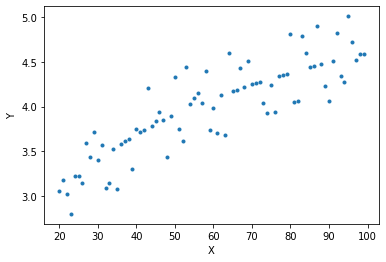

In [ ]:
# we can throttle the error rate
err = .5
random.seed(42)

# our data has a known underlying functional form (log(x))
def func(x, err):
  return np.log(x) + err * random.randint(-1,1) * random.random()
x = np.arange(20,100)
y = [func(t, err) for t in x]
plt.plot(x,y, ls='', marker='.')
plt.xlabel('X')
plt.ylabel('Y')

Now, let's pretend we've sampled from this ***population*** of data:

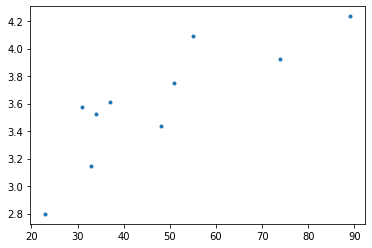

In [ ]:
random.seed(42)
X_train = random.sample(list(x), 10)

indices = [list(x).index(i) for i in X_train]
# we could also do it this way: np.argwhere([i in X_train for i in x])

y_train = [y[i] for i in indices]

plt.plot(X_train,y_train, ls='', marker='.')

Now let's take two extreme scenarios, fitting a linear line and a high order polynomial, to these datapoints. Keeping in mind the larger dataset, as well as the error we introduced in our data generating function, this will really illustrate our point!

Text(0.5, 1.0, 'High Variance Model')

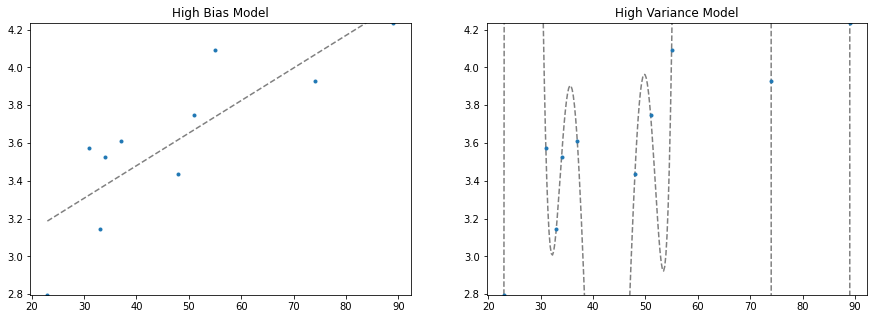

In [ ]:
# solving our training data with a n-degree polynomial
coefs = np.polyfit(X_train, y_train, 9)

# solve the slope and intercept of our 1-degree polynomial ;)
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)

# create some x data to plot our functions
X_seq = np.linspace(min(X_train),max(X_train),300).reshape(-1,1)

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(X_seq, model.predict(X_seq), c='grey', ls='--')
ax[0].plot(X_train, y_train, ls='', marker='.')
ax[0].set_ylim(min(y_train), max(y_train))
ax[0].set_title("High Bias Model")


ax[1].plot(X_seq, np.polyval(coefs, X_seq), c='grey', ls='--')
ax[1].plot(X_train, y_train, ls='', marker='.')
ax[1].set_ylim(min(y_train), max(y_train))
ax[1].set_title("High Variance Model")

We've demonstrated two extreme cases. On the left, we limit our regression to only two parameters, a slope and a y-intercept. We say that this model has *high bias* because we are forcing the functional form without much consideration to the underlying data &mdash; we are saying this data is generated by a linear function, and no matter what data I train on, my final model will still be a straight line that more or less appears the same. Put another way, it has *low variance* with respect to the underlying data. 

On the right, we've allowed our model just as many polynomials it needs to perfectly fit the training data! We say this model has *low bias* because we don't introduce many constraints on the final form of the model. it is *high variance* because depending on the underlying training data, the final outcome of the model can change quite drastically!

In reality, the best model lies somewhere between these two cases. In the next few paragraphs we'll explore this concept further:

1. what happens when we retrain these models on different samples of the data population
  * and let's use this to better understand what we mean by *bias* and *variance*
2. what happens when we tie this back in with the error we introduced to the data generator?
  * and let's use this to better understand irreducible error

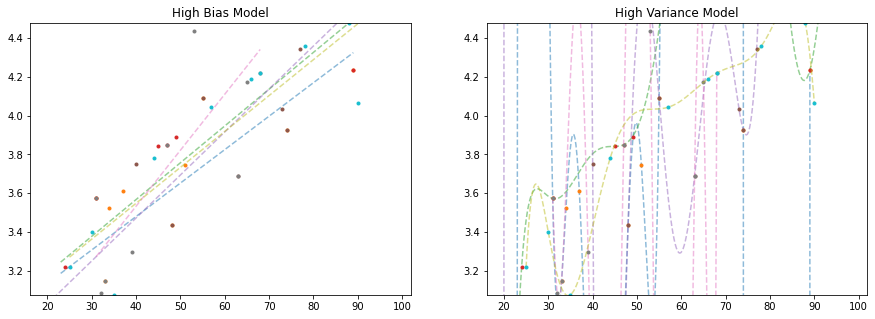

In [ ]:
random.seed(42)
fig, ax = plt.subplots(1,2,figsize=(15,5))
for samples in range(5):
  X_train = random.sample(list(x), 10)
  indices = [list(x).index(i) for i in X_train]
  y_train = [y[i] for i in indices]

  # solving our training data with a n-degree polynomial
  coefs = np.polyfit(X_train, y_train, 9)

  # solve the slope and intercept of our 1-degree polynomial ;)
  model = LinearRegression()
  model.fit(np.array(X_train).reshape(-1,1), y_train)

  # create some x data to plot our functions
  X_seq = np.linspace(min(X_train),max(X_train),300).reshape(-1,1)

  
  ax[0].plot(X_seq, model.predict(X_seq), alpha=0.5, ls='--')
  ax[0].plot(X_train, y_train, ls='', marker='.')
  ax[0].set_ylim(min(y_train), max(y_train))
  ax[0].set_title("High Bias Model")


  ax[1].plot(X_seq, np.polyval(coefs, X_seq), alpha=0.5, ls='--')
  ax[1].plot(X_train, y_train, ls='', marker='.')
  ax[1].set_ylim(min(y_train), max(y_train))
  ax[1].set_title("High Variance Model")

As we can see, depending on what data we train our model on, the *high bias* model changes relatively slightly, while the *high variance* model changes a whole awful lot!

The *high variance* model is prone to something we call *overfitting*. It fits the training data very well, but at the expense of creating a good, generalizable model that does well on unseen data. Let's take our last models, and plot them along the rest of the unseen data, what we'll call the *population*

Text(0.5, 1.0, 'High Variance Model')

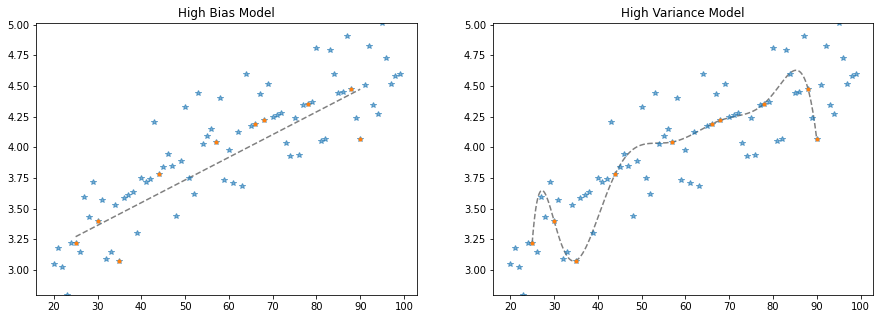

In [ ]:
# solving our training data with a n-degree polynomial
coefs = np.polyfit(X_train, y_train, 9)

# solve the slope and intercept of our 1-degree polynomial ;)
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)

# create some x data to plot our functions
X_seq = np.linspace(min(X_train),max(X_train),300).reshape(-1,1)

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(X_seq, model.predict(X_seq), c='grey', ls='--')
ax[0].plot(x, y, ls='', marker='*', alpha=0.6)
ax[0].plot(X_train, y_train, ls='', marker='.')
ax[0].set_ylim(min(y), max(y))
ax[0].set_title("High Bias Model")


ax[1].plot(X_seq, np.polyval(coefs, X_seq), c='grey', ls='--')
ax[1].plot(x, y, ls='', marker='*', alpha=0.6)
ax[1].plot(X_train, y_train, ls='', marker='.')
ax[1].set_ylim(min(y), max(y))
ax[1].set_title("High Variance Model")

In particular, we see that the high variance model is doing very wacky things, demonstrating behaviors in the model where the underlying population data really gives no indication of such behavior. We say that these high variance model are particuarly prone to the phenomenon of *over fitting* and this is generally due to the fact that there is irreducible error in the underlying data. Let's demonstrate this.

### ❕ Irreducible Error

Irreducible error is ***always*** present in our data. It is a part of life, welcome to it. That being said, let's look what happens when we *pretend* there isn't any irreducible error in our population data

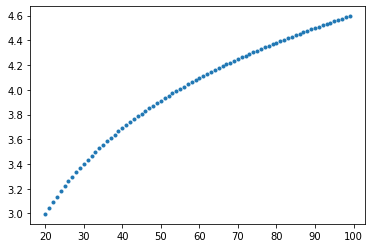

In [ ]:
x = np.arange(20,100)
y = [func(t, err=0) for t in x]
plt.plot(x,y, ls='', marker='.')

Text(0.5, 1.0, 'High Variance Model')

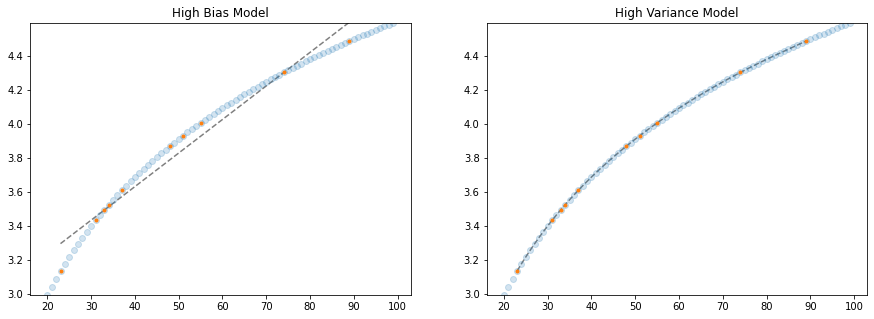

In [ ]:
random.seed(42)
X_train = random.sample(list(x), 10)

indices = [list(x).index(i) for i in X_train]
# we could also do it this way: np.argwhere([i in X_train for i in x])

y_train = [y[i] for i in indices]

# solving our training data with a n-degree polynomial
coefs = np.polyfit(X_train, y_train, 9)

# solve the slope and intercept of our 1-degree polynomial ;)
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)

# create some x data to plot our functions
X_seq = np.linspace(min(X_train),max(X_train),300).reshape(-1,1)

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(X_seq, model.predict(X_seq), c='grey', ls='--')
ax[0].plot(x, y, ls='', marker='o', alpha=0.2)
ax[0].plot(X_train, y_train, ls='', marker='.')
ax[0].set_ylim(min(y), max(y))
ax[0].set_title("High Bias Model")


ax[1].plot(X_seq, np.polyval(coefs, X_seq), c='grey', ls='--')
ax[1].plot(x, y, ls='', marker='o', alpha=0.2)
ax[1].plot(X_train, y_train, ls='', marker='.')
ax[1].set_ylim(min(y), max(y))
ax[1].set_title("High Variance Model")

This time, our high variance model really *gets it*! And this is because the data we trained on actually *is* a good representation of the entire population. But this, in reality, almost never, ever happens. In the real world, we have irreducible error in our data samples, and we must account for this when choosing our model. 

I'm summary, we call this balance between error in our model functional form, and error from succumbing to irreducible error in our training data, the *bias variance tradeoff*

### 🕸️ Regularization

To talk about regularization, we're going to continue with our simple high bias model example, the much revered linear regression model. Linear regression takes on the form:

$$y(x)= m\cdot x + b$$ 

where $y$ is some target value and, $x$ is some feature; $m$ and $b$ are the slope and intercept, respectively.

To solve the problem, we need to find the values of $b$ and $m$ in equation 1 to best fit the data. 

In linear regression our goal is to minimize the error between computed values of positions $y^{\sf calc}(x_i)\equiv y^{\sf calc}_i$ and known values $y^{\sf exact}(x_i)\equiv y^{\sf exact}_i$, i.e. find $b$ and $m$ which lead to lowest value of

$$\epsilon (m,b) =SS_{\sf res}=\sum_{i=1}^{N}\left(y^{\sf exact}_i - y^{\sf calc}_i\right)^2 = \sum_{i=1}^{N}\left(y^{\sf exact}_i - m\cdot x_i - b \right)^2$$


**Now onto Regularization**

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/machine_learning/ML6.png" width=1000px></img>

There are many other regression algorithms, the two we want to highlight here are Ridge Regression and LASSO. They differ by an added term to the loss function. Let's review. The above equation expanded to multivariate form yields:

$$\sum_{i=1}^{N}(y_i - \sum_{j=1}^{P}x_{ij}\beta_{j})^2$$

for Ridge regression, we add a **_regularization_** term known as **_L2_** regularization:

$$\sum_{i=1}^{N}(y_i - \sum_{j=1}^{P}x_{ij}\beta_{j})^2 + \lambda \sum_{j=1}^{P}\beta_{j}^2$$

for **_LASSO_** (Least Absolute Shrinkage and Selection Operator) we add **_L1_** regularization:

$$\sum_{i=1}^{N}(y_i - \sum_{j=1}^{P}x_{ij}\beta_{j})^2 + \lambda \sum_{j=1}^{P}|\beta_{j}|$$

The difference between the two is that LASSO will allow coefficients to shrink to 0 while Ridge regression will not. **_Elastic Net_** is a combination of these two regularization methods. The key notion here is that ***regularization*** is a way of tempering our model, allowing it to pick for itself the most appropriate features. This crops up in many places other than simple linear regression in machine learning.

**Regularization appears in...**

***Ensemble learners*** (e.g. XGBoost and Random Forests) by combining the combinations of many weak algorithms 

***Neural networks*** with ***dropout*** and ***batch normalization***

Dropout is the Neural Network response to the wide success of ensemble learning. In a dropout layer, random neurons are dropped in each batch of training, i.e. their weighted updates are not sent to the next neural layer. Just as we learned with random forests, the end result is that the neural network can be thought of as many _independent models_ that _vote_ on the final output. 

Put another way, when a network does not contain dropout layers, and has a capacity that exceeds that which would be suited for the true, underlying complexity level of the data, it can begin to fit to noise. This ability to fit to noise is based on very specific relationships between neurons, which fire uniquely given the particular training example. Adding dropout _breaks_ these specific neural connections, and so the neural network as a whole is forced to find weights that apply generally, as there is no guarantee they will be _turned on_ when their specific training example they would usually overfit for comes around again. 

<p align=center>
<img src="https://i.imgur.com/a86utxY.gif"></img>
</p>
<small> Network with 50% dropout. Borrowed from Kaggle learn. </small>

